In [189]:
!pip install opencv-python
!pip install matplotlib
!pip install scikit-image
!pip install numpy
!pip install stsci.ndimage
!pip install scikit-image
!pip install pandas


  Using cached stsci.ndimage-0.10.3.tar.gz (99 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [72 lines of output]
    Using cached stsci.distutils-0.3.7.tar.gz (48 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Installing backend dependencies: started
    Installing backend dependencies: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'error'
    error: subprocess-exited-with-error
  
    Preparing metadata (pyproject.toml) did not run successfully.
    exit code: 1
  
    [45 lines of output]
    <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    C:\Users\vmarq\AppData\Local\Temp\pip-buil

In [191]:
import cv2
import matplotlib.pylab as plt
from skimage.segmentation import felzenszwalb
from skimage.color import rgba2rgb
from skimage import io, measure
import numpy as np
from scipy import ndimage as nd
from skimage.color import label2rgb

## Reading Imagens

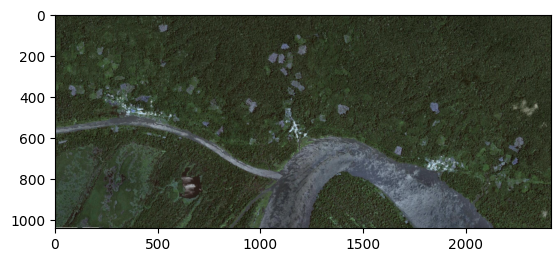

In [28]:
img = cv2.imread("image.png")
plt.imshow(img)

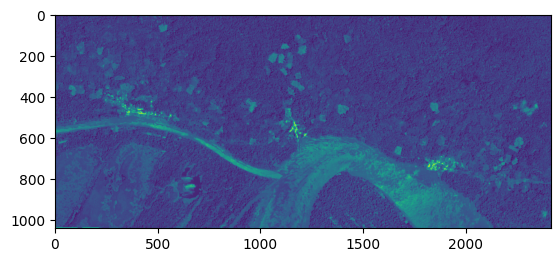

## Display Images

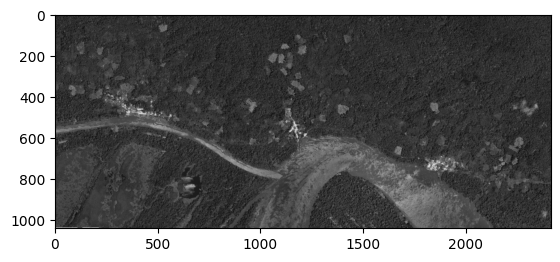

In [61]:
plt.figure("Original")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)

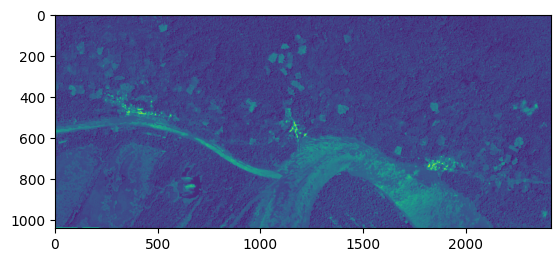

In [18]:
plt.figure("Grayscale")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

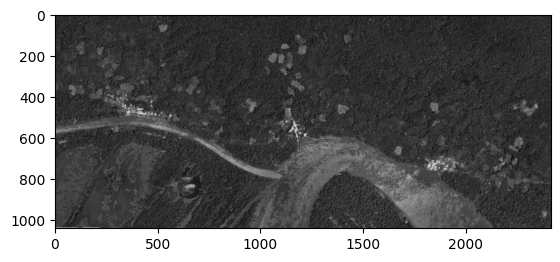

In [30]:
plt.figure("Grayscale")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

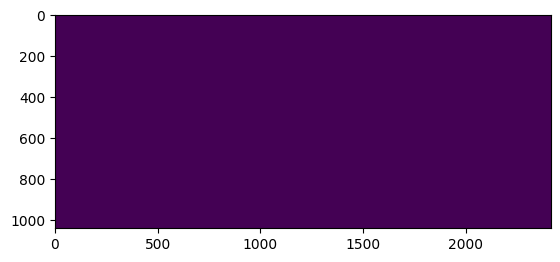

In [31]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
plt.figure("Binary")
plt.imshow(thresh)

### O algoritimo OTSU separa os pixels reune os pixels com maior variacao, nesse caso, apos a utilizacao do filtro binario a imagen sofre um processo para destacar os grupos (255 ou 0)

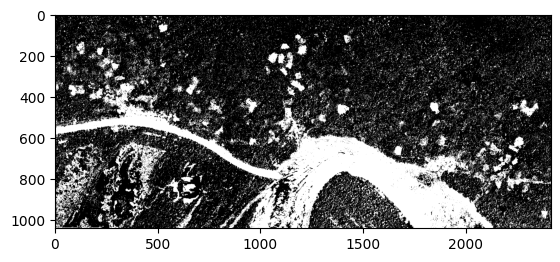

In [32]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure("OTSU")
plt.imshow(thresh, cmap="gray")

### Utilizacao do filtro de binario juntamente com a escala de cinza da imagem 

In [31]:
print(ret)

66.0


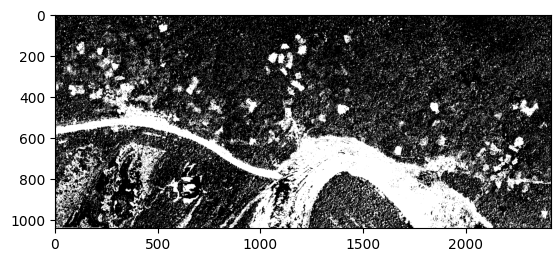

In [31]:
ret, thresh = cv2.threshold(gray, 66, 255, cv2.THRESH_BINARY)
plt.figure("Binary")
plt.imshow(thresh, cmap="gray")

### Inversao do binario

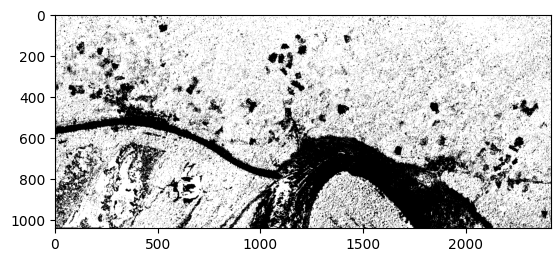

In [34]:
ret, thresh = cv2.threshold(gray, 66, 255, cv2.THRESH_BINARY_INV)
plt.figure("Binary")
plt.imshow(thresh, cmap="gray")

[  0 100]


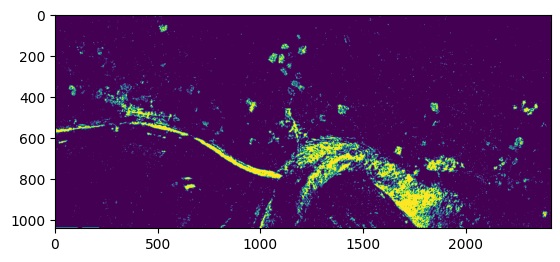

In [39]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_TRIANGLE)
plt.figure("Triangle") 

thresh = np.array(thresh)
thresh[thresh == 255] = 100

plt.imshow(thresh)
print(np.unique(thresh))


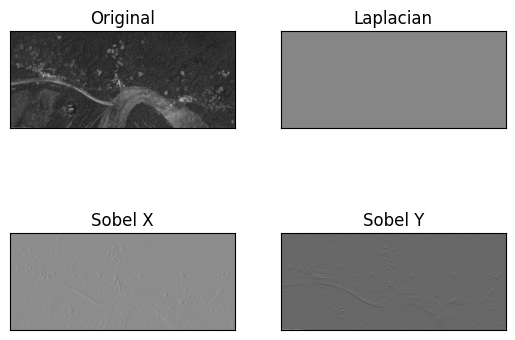

In [48]:
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()



### HSL

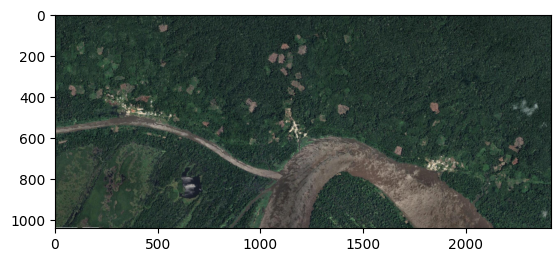

In [131]:
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

#### Convert to HSV

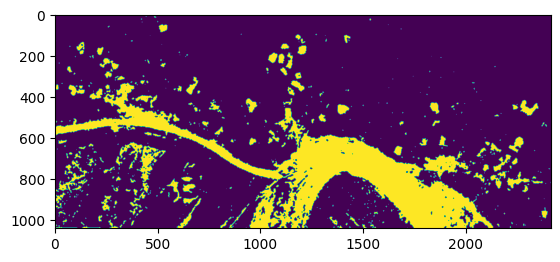

In [183]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(thresh_hsv, (0, 0, 250), (180, 70, 255))
plt.imshow(mask)

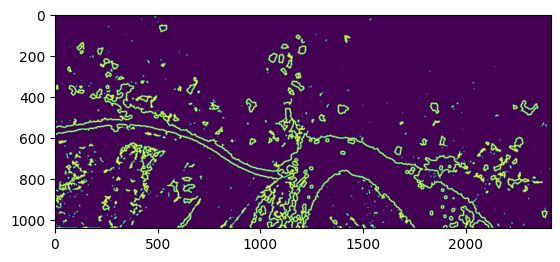

In [179]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(thresh_hsv, (0, 0, 250), (180, 70, 255))

mask = cv2.medianBlur(mask, 5)

thresh = cv2.adaptiveThreshold(mask, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=15, C=0)


plt.imshow(thresh)

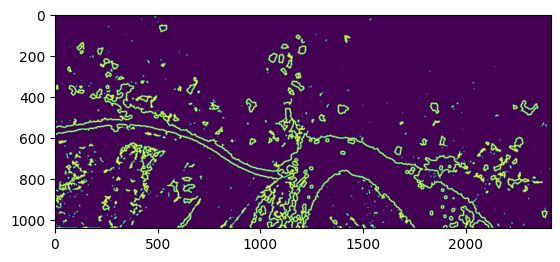

In [181]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(thresh_hsv, (0, 0, 250), (180, 70, 255))

mask = cv2.medianBlur(mask, 5)

thresh = cv2.adaptiveThreshold(mask, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=15, C=0)


plt.imshow(thresh)

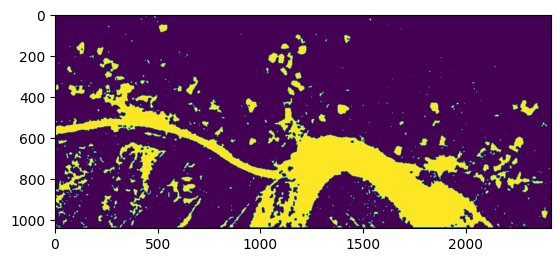

In [187]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(thresh_hsv, (0, 0, 250), (180, 70, 255))
closed_mask = nd.binary_closing(mask, np.ones((7,7)))
plt.imshow(closed_mask)


In [ ]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(thresh_hsv, (0, 0, 250), (180, 70, 255))
closed_mask = nd.binary_closing(mask, np.ones((7,7)))
plt.imshow(closed_mask)

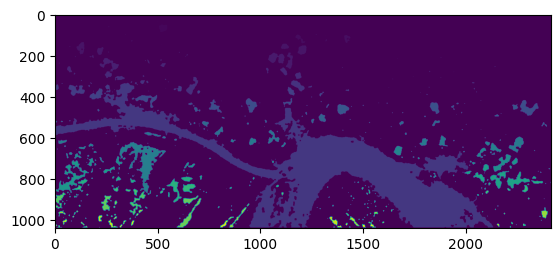

In [194]:
label_image = measure.label(closed_mask)
plt.imshow(label_image)

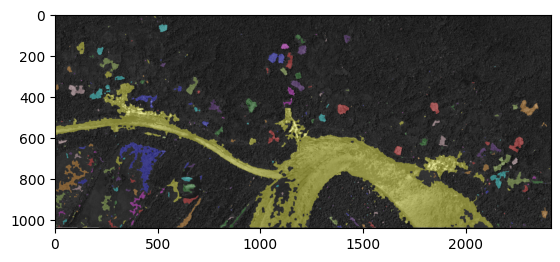

In [199]:
img = io.imread('image.png')

image_label_overlay = label2rgb(label_image, image=cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(image_label_overlay)

In [ ]:
props = measure.regionprops_table(label_image, img, properties = ['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])

